## This Jupyter notebook lets users analyze data generated with the pc4covid19 app

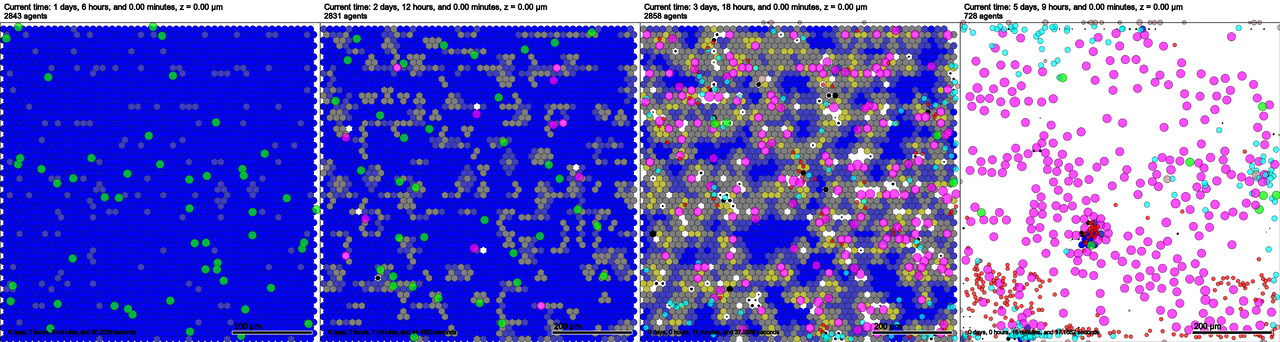

In [1]:
from IPython.display import Image
Image(filename="data/cells_4times.jpg")

In [2]:
import os
import glob
os.chdir('data')
xml_files = glob.glob('output*.xml')
xml_files.sort()
os.chdir('..')
print(xml_files)

['output00000000.xml', 'output00000001.xml', 'output00000002.xml', 'output00000003.xml', 'output00000004.xml', 'output00000005.xml', 'output00000006.xml', 'output00000007.xml', 'output00000008.xml', 'output00000009.xml', 'output00000010.xml', 'output00000011.xml', 'output00000012.xml', 'output00000013.xml', 'output00000014.xml', 'output00000015.xml', 'output00000016.xml', 'output00000017.xml', 'output00000018.xml', 'output00000019.xml', 'output00000020.xml', 'output00000021.xml', 'output00000022.xml', 'output00000023.xml', 'output00000024.xml', 'output00000025.xml', 'output00000026.xml', 'output00000027.xml', 'output00000028.xml', 'output00000029.xml', 'output00000030.xml', 'output00000031.xml', 'output00000032.xml', 'output00000033.xml', 'output00000034.xml', 'output00000035.xml', 'output00000036.xml', 'output00000037.xml', 'output00000038.xml', 'output00000039.xml', 'output00000040.xml', 'output00000041.xml', 'output00000042.xml', 'output00000043.xml']


## Read a single data file and find out how many cells there are of different cell types.

In [3]:
from pyMCDS_cells import pyMCDS_cells
import numpy as np

# ---> Edit the .xml filename to see different results
mcds = pyMCDS_cells('output00000030.xml','data')
#mcds = pyMCDS_cells('output00000043.xml','data')   # max file index is 43
print('time=',mcds.get_time())
cell_type = mcds.data['discrete_cells']['cell_type']
#print(cell_type)
cd8 = np.where(cell_type == 3.0)
macrophage = np.where(cell_type == 4.0)
neutrophil = np.where(cell_type == 5.0)
print('# cd8, macrophage, neutrophil = ',len(cd8[0]), len(macrophage[0]), len(neutrophil[0]) )

time= 5400.0
# cd8, macrophage, neutrophil =  59 178 103


In [4]:
# Loop over all output files and store one array of times and one array of numbers of macrophages
n = len(xml_files)
t= np.zeros(n)
num_mac = np.zeros(n)
idx = 0
for f in xml_files:
    mcds = pyMCDS_cells(f,'data')
    cell_type = mcds.data['discrete_cells']['cell_type']
    macrophage = np.where(cell_type == 4.0)
    t[idx] = mcds.get_time()
    num_mac[idx] = len(macrophage[0])
    idx += 1

In [5]:
t

array([   0.,  180.,  360.,  540.,  720.,  900., 1080., 1260., 1440.,
       1620., 1800., 1980., 2160., 2340., 2520., 2700., 2880., 3060.,
       3240., 3420., 3600., 3780., 3960., 4140., 4320., 4500., 4680.,
       4860., 5040., 5220., 5400., 5580., 5760., 5940., 6120., 6300.,
       6480., 6660., 6840., 7020., 7200., 7380., 7560., 7740.])

In [6]:
num_mac

array([ 50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,
        50.,  50.,  50.,  50.,  48.,  48.,  48.,  48.,  48.,  48.,  48.,
        57.,  74.,  92., 107., 121., 136., 153., 165., 178., 194., 206.,
       220., 234., 243., 253., 267., 274., 284., 292., 301., 300., 303.])

In [7]:
import matplotlib.pyplot as plt
plt.plot(t,num_mac,'-o',)
plt.show()

<Figure size 640x480 with 1 Axes>

In [8]:
# Loop over all output files and store times and counts of cell types
num_cd8 = np.zeros(n)
num_neut = np.zeros(n)

idx = 0
for f in xml_files:
    mcds = pyMCDS_cells(f,'data')
    cell_type = mcds.data['discrete_cells']['cell_type']
    cd8 = np.where(cell_type == 3.0)
    neutrophil = np.where(cell_type == 5.0)
    t[idx] = mcds.get_time()
    num_cd8[idx] = len(cd8[0])
    num_neut[idx] = len(neutrophil[0])
    idx += 1

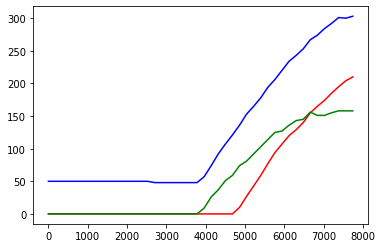

In [9]:
plt.plot(t,num_mac,'blue', t,num_cd8,'red', t,num_neut,'green')

## Experiment with plotting side-by-side results

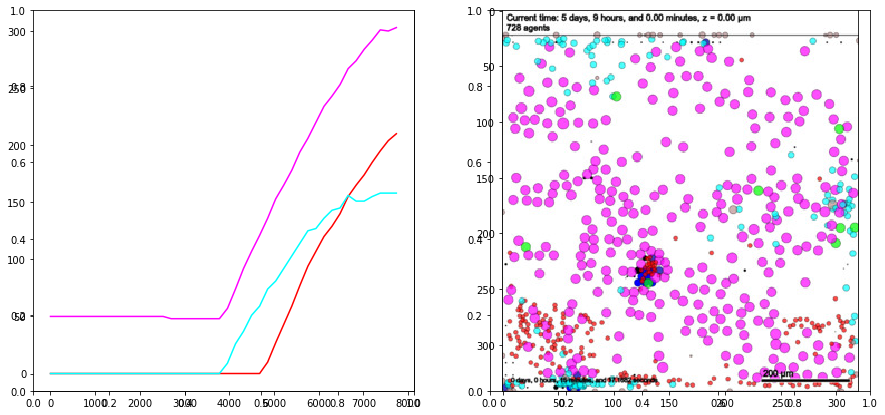

In [10]:
# Experiment with plotting side-by-side results
import matplotlib.image as mpimg
fig, axs = plt.subplots(1,2,figsize=(15,7))

fig.add_subplot(121)
plt.plot(t,num_mac,'fuchsia', t,num_cd8,'red', t,num_neut,'cyan')
img = np.uint8(mpimg.imread('data/snapshot00000043.jpg'))
fig.add_subplot(122)
plt.imshow(img)